File Reading using Pandas

In [10]:
import pandas as pd
# Reading Dataset
df = pd.read_csv('titanic.csv')


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Function with Docstring for summary description

In [12]:
def describe_dataset(data):
    """
    This function will give summary of the dataset.
    Parameters:
    data (DataFrame): Dataframe that is input will work for dataset.
    Returns:
    DataFrame: Summary statistics of the dataset.
    """
    return data.describe()


In [13]:
summary_stats = describe_dataset(df)
print(summary_stats)


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Transpose and Clean the Dataset:

In [16]:
# Drop the useless columns
df = df.drop(['Ticket', 'Cabin'], axis=1)

# Dropping rows with missing values
df = df.dropna()


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Plot histogram for Age

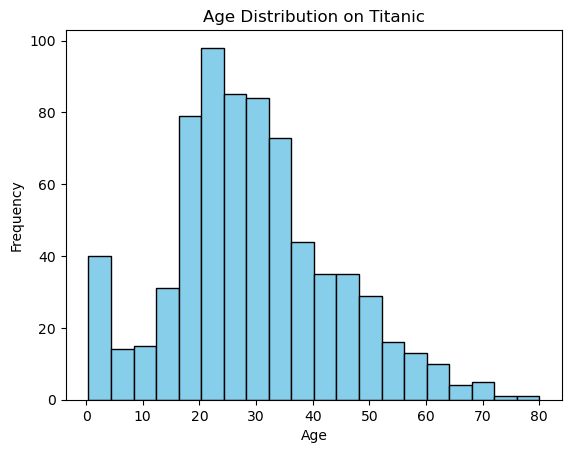

In [23]:
# Plot histogram for Age
import matplotlib.pyplot as plt
df['Age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution on Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



Scatter Plot for Age vs Fare

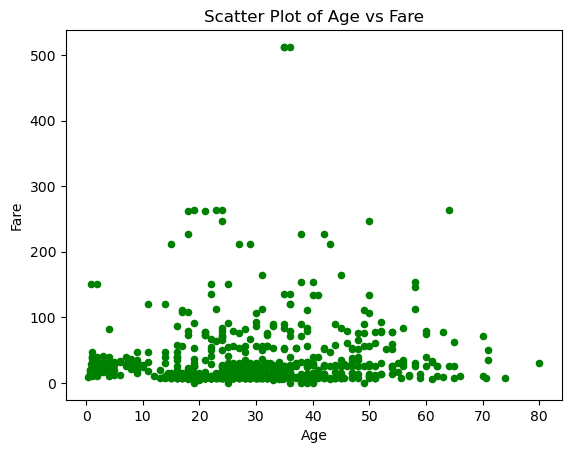

In [24]:
# Plot scatter plot for Age vs Fare
df.plot.scatter(x='Age', y='Fare', color='green')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


Two Advanced Methods

In [29]:
# Group by 'Sex' and calculate average age
avg_age_by_sex = df.groupby('Sex')['Age'].mean()
print("Average age by sex:")
print(avg_age_by_sex)

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()
print("Correlation matrix:")
print(corr_matrix)


Average age by sex:
Sex
female    27.745174
male      30.726645
Name: Age, dtype: float64
Correlation matrix:
             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.029526 -0.035609  0.033681 -0.082704 -0.011672   
Survived        0.029526  1.000000 -0.356462 -0.082446 -0.015523  0.095265   
Pclass         -0.035609 -0.356462  1.000000 -0.365902  0.065187  0.023666   
Age             0.033681 -0.082446 -0.365902  1.000000 -0.307351 -0.187896   
SibSp          -0.082704 -0.015523  0.065187 -0.307351  1.000000  0.383338   
Parch          -0.011672  0.095265  0.023666 -0.187896  0.383338  1.000000   
Fare            0.009655  0.266100 -0.552893  0.093143  0.139860  0.206624   

                 Fare  
PassengerId  0.009655  
Survived     0.266100  
Pclass      -0.552893  
Age          0.093143  
SibSp        0.139860  
Parch        0.206624  
Fare         1.000000  


heatmap for correlation matrix

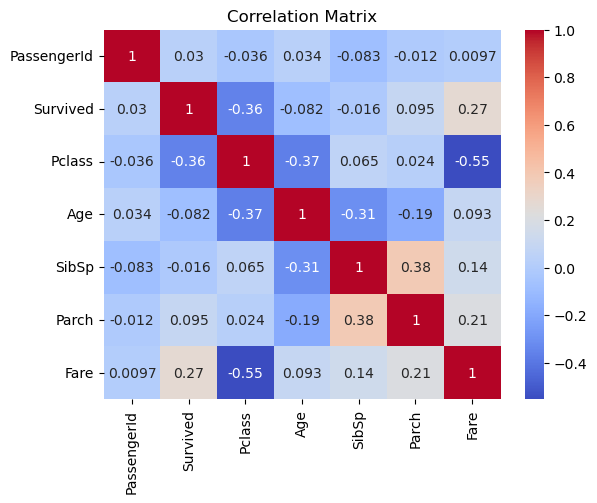

In [30]:
import seaborn as sns

# Plot heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Bar Plot between Survived and Sex

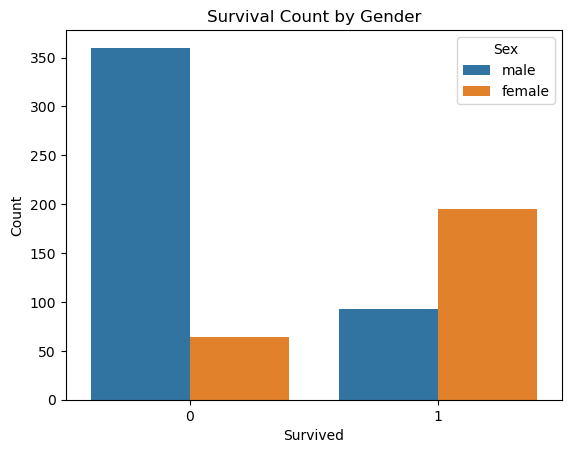

In [32]:
import seaborn as sns

# Plot bar chart between Survived and Sex
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Survival Count by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
